To do list:

- Columns showing difference in ncr, scr cr, nwp
- NCR against NWP 2016
- NCR against NWP 2017
- NCR against NWP 2018
- NCR against NWP 2019
- NCR against NWP 2020
- Top increases in nwp over time
- Top increases in scr cr over time
- Top decreases in ncr over time
- Remove =equity from titles
- readme

# Insurance Firm Analysis Report

## Preparing and Cleaning the Data

We start by importing the necessary packages.

In [1]:
%pip install -r requirements.txt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


We now load the csv files into pandas dataframes. The files have been edited so the years of each recorded metric are now in the column names. This was to change the data types of the columns from objects to floats to more easily perform mathematical operations on them. The first row which previously had the years has thus been removed.

In [2]:
df1 = pd.read_csv('Data-for-technical-assessment - Dataset 1 - General.csv')
df2 = pd.read_csv('Data-for-technical-assessment - Dataset 2 - Underwriting.csv')

To further clean the first dataset, we rename the first column naming the firms from 'Unnamed' to 'Firm' and remove the word 'Firm' from all the rows. There are also rows with no data in them (all zeros) so we filter these out. The variable `numeric_columns` selects all the columns of numeric data types (the first column is still of type 'object'). The following line then filters the rows where the column values add up to zero.

In [3]:
def clean_firm_name_column(df: pd.DataFrame) -> pd.DataFrame:
    df.rename(columns={'Unnamed: 0': 'Firm'}, inplace=True)
    df['Firm'] = df['Firm'].str.replace('Firm ', '')
    return df

# df1.rename(columns={'Unnamed: 0': 'Firm'}, inplace=True)
# df1['Firm'] = df1['Firm'].str.replace('Firm ', '')

def filter_rows_with_no_data(df: pd.DataFrame) -> pd.DataFrame:
    numeric_columns = df.select_dtypes(include='number').columns
    df = df[df[numeric_columns].sum(axis=1) > 0]
    return df


#numeric_columns = df1.select_dtypes(include='number').columns
# df1 = df1[df1[numeric_columns].sum(axis=1) > 0]

df1 = clean_firm_name_column(df1)
df1 = filter_rows_with_no_data(df1)
df1

,Firm,NWP 2016 (£m),NWP 2017 (£m),NWP 2018 (£m),NWP 2019 (£m),NWP 2020 (£m),SCR 2016 (£m),SCR 2017 (£m),SCR 2018 (£m),SCR 2019 (£m),...,Total liabilities 2016 (£m),Total liabilities 2017 (£m),Total liabilities 2018 (£m),Total liabilities 2019 (£m),Total liabilities 2020 (£m),Excess of assets over liabilities 2016 (£m) [= equity],Excess of assets over liabilities 2017 (£m) [= equity],Excess of assets over liabilities 2018 (£m) [= equity],Excess of assets over liabilities 2019 (£m) [= equity],Excess of assets over liabilities 2020 (£m) [= equity]
0,1,-13779.815630,0.000000,0.000000,0.000000,0.000000,1085.360139,9.635840e-09,0.000000,0.000000,...,69696.557130,0.000000,0.000000,0.000000,0.000000,2031.035937,4.817920,0.000000,0.000000,0.000000
1,2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,1.011357e+01,9.495235,8.146471,...,8.526315,9.585694,8.596011,6.932901,8.526285,33.391180,40.637281,50.621614,57.602326,29.652400
2,3,0.000000,75.609681,70.578732,78.432782,85.735830,322.955115,3.637823e+02,362.290859,394.295982,...,926.065667,1016.401689,974.733900,1032.497033,1214.913306,583.650604,558.916856,566.073253,598.338699,540.065747
3,4,22344.199920,23963.910710,25760.390160,25512.748840,24996.021040,16573.644800,1.633275e+04,17103.616000,17219.246080,...,50485.010600,56618.706220,62935.244440,64005.547970,71237.711000,16919.338530,16415.923040,18249.584830,20795.976010,22827.370030
4,5,68.200993,51.663132,44.010833,42.008556,81.273653,52.824396,3.805377e+01,34.696815,57.231788,...,193.425808,161.417709,118.910867,107.269800,104.922113,148.433518,150.091268,152.205234,142.479147,130.559790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,0.000000,0.000000,-1.011367,-6.599067,24.632234,0.000000,2.586211e-01,62.227588,51.830942,...,0.000000,0.011563,1463.469961,1454.672025,6555.130578,0.000000,3.844471,128.747010,291.664237,295.164914
321,322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,1711.220667,1.641309e+03,1329.471064,1399.098954,...,4356.540094,4196.807794,3563.157504,3562.263544,3749.420368,2106.880505,2532.760949,2580.812898,2262.969251,2135.697712
322,323,0.000000,0.000000,0.000000,0.000000,0.000000,30.438558,1.523262e+01,5.332069,1.551370,...,32.093423,40.204325,17.498722,11.666018,9.091165,40.334144,61.742553,64.102075,61.516112,4.104700
323,324,23.415380,22.650321,24.268465,25.811984,26.546638,32.096633,3.020595e+01,29.517977,29.954935,...,214.722877,199.960786,231.214038,222.590029,245.832217,52.133515,46.976232,50.522585,55.057676,53.507509


Doing the same to the second dataset.

In [4]:
df2 = clean_firm_name_column(df2)
df2 = filter_rows_with_no_data(df2)
df2

,Firm,Gross claims incurred 2016 (£m),Gross claims incurred 2017 (£m),Gross claims incurred 2018 (£m),Gross claims incurred 2019 (£m),Gross claims incurred 2020 (£m),"Gross BEL (inc. TPs as whole, pre-TMTP) 2016 (£m)","Gross BEL (inc. TPs as whole, pre-TMTP) 2017 (£m)","Gross BEL (inc. TPs as whole, pre-TMTP) 2018 (£m)","Gross BEL (inc. TPs as whole, pre-TMTP) 2019 (£m)",...,Gross expense ratio 2016,Gross expense ratio 2017,Gross expense ratio 2018,Gross expense ratio 2019,Gross expense ratio 2020,Gross combined ratio 2016,Gross combined ratio 2017,Gross combined ratio 2018,Gross combined ratio 2019,Gross combined ratio 2020
0,1,0.000000,0.046674,0.000000,0.000000,0.000000,0.000000,7.674468,0.000000,0.000000,...,0.000000,56.813725,0.000000,0.000000,0.000000,0.000000,68.215239,0.000000,0.000000,0.000000
1,2,39.241067,35.948249,29.002244,0.000000,0.000000,163.597907,195.529933,201.533018,0.000000,...,0.743265,0.963451,0.814588,0.000000,0.000000,0.945394,1.126744,0.939197,0.000000,0.000000
3,4,17.125976,75.535951,119.426995,35.884204,6.567988,-18.297099,22.640145,80.383783,99.569129,...,0.143930,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
4,5,30.485185,247.872969,449.874740,348.536337,373.786832,20.800452,128.228962,349.410757,314.069649,...,0.177212,0.134310,0.109074,0.121044,0.109187,0.508711,1.259454,1.304168,0.983277,0.997184
5,6,411.242080,236.074128,247.983628,187.615995,178.323198,716.575166,706.087194,620.435893,586.181538,...,0.236662,0.242863,0.232953,0.198427,0.155372,1.262200,0.840078,0.922944,0.769213,0.752116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,5.944781,21.240734,4.003907,0.669052,28.420667,20.357838,28.812127,23.833405,10.559672,...,0.271299,0.196375,0.216326,0.146491,0.100329,0.616382,1.403960,0.467308,0.185760,1.227776
320,321,4.928695,4.808705,4.809954,4.798020,3.465836,0.340207,0.386327,0.350345,0.522483,...,0.211938,0.256118,0.245704,0.236224,0.278674,0.978004,1.002691,0.972540,0.958443,0.816870
321,322,82.741987,96.426952,83.289347,125.995045,200.694626,499.918564,481.649566,496.408111,528.420014,...,0.364543,0.372169,0.398770,0.420327,0.373813,0.885956,0.960993,0.913687,0.943246,0.995833
323,324,6.739499,6.837802,6.863463,7.242601,5.098240,2.073365,2.273636,2.463059,0.800347,...,0.427635,0.371681,0.357627,0.330893,0.302577,1.063136,1.006945,0.982816,0.994712,0.780065


In [13]:
combined_df = pd.merge(df1, df2, on='Firm', how='inner')
combined_df

,Firm,NWP 2016 (£m),NWP 2017 (£m),NWP 2018 (£m),NWP 2019 (£m),NWP 2020 (£m),SCR 2016 (£m),SCR 2017 (£m),SCR 2018 (£m),SCR 2019 (£m),...,Gross expense ratio 2016,Gross expense ratio 2017,Gross expense ratio 2018,Gross expense ratio 2019,Gross expense ratio 2020,Gross combined ratio 2016,Gross combined ratio 2017,Gross combined ratio 2018,Gross combined ratio 2019,Gross combined ratio 2020
0,1,-13779.815630,0.000000,0.000000,0.000000,0.000000,1085.360139,9.635840e-09,0.000000,0.000000,...,0.000000,56.813725,0.000000,0.000000,0.000000,0.000000,68.215239,0.000000,0.000000,0.000000
1,2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,1.011357e+01,9.495235,8.146471,...,0.743265,0.963451,0.814588,0.000000,0.000000,0.945394,1.126744,0.939197,0.000000,0.000000
2,4,22344.199920,23963.910710,25760.390160,25512.748840,24996.021040,16573.644800,1.633275e+04,17103.616000,17219.246080,...,0.143930,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
3,5,68.200993,51.663132,44.010833,42.008556,81.273653,52.824396,3.805377e+01,34.696815,57.231788,...,0.177212,0.134310,0.109074,0.121044,0.109187,0.508711,1.259454,1.304168,0.983277,0.997184
4,6,1826.798004,3040.633852,1634.218908,3082.590166,3041.876078,2717.768106,2.791422e+03,2804.596443,3066.367918,...,0.236662,0.242863,0.232953,0.198427,0.155372,1.262200,0.840078,0.922944,0.769213,0.752116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,319,0.000964,0.000000,0.000964,0.000000,0.000000,0.079965,6.921959e-02,0.152147,0.123709,...,0.271299,0.196375,0.216326,0.146491,0.100329,0.616382,1.403960,0.467308,0.185760,1.227776
217,321,0.000000,0.000000,-1.011367,-6.599067,24.632234,0.000000,2.586211e-01,62.227588,51.830942,...,0.211938,0.256118,0.245704,0.236224,0.278674,0.978004,1.002691,0.972540,0.958443,0.816870
218,322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,1711.220667,1.641309e+03,1329.471064,1399.098954,...,0.364543,0.372169,0.398770,0.420327,0.373813,0.885956,0.960993,0.913687,0.943246,0.995833
219,324,23.415380,22.650321,24.268465,25.811984,26.546638,32.096633,3.020595e+01,29.517977,29.954935,...,0.427635,0.371681,0.357627,0.330893,0.302577,1.063136,1.006945,0.982816,0.994712,0.780065


## Analysing the Data

In [5]:
nwp_df = df1[['Firm', 'NWP 2016 (£m)', 'NWP 2017 (£m)', 'NWP 2018 (£m)', 'NWP 2019 (£m)', 'NWP 2020 (£m)']]
nwp_df = filter_rows_with_no_data(nwp_df)
nwp_df['Difference in NWP between 2016 and 2020'] = nwp_df['NWP 2020 (£m)']  - nwp_df['NWP 2016 (£m)']
nwp_df.sort_values('Difference in NWP between 2016 and 2020', ascending=False).head(10)

,Firm,NWP 2016 (£m),NWP 2017 (£m),NWP 2018 (£m),NWP 2019 (£m),NWP 2020 (£m),Difference in NWP between 2016 and 2020
310,311,-1862.240506,9777.534671,12009.157860,12719.398350,10830.966260,12693.206766
209,210,27889.340760,38199.311260,48117.993730,44638.769640,40135.692260,12246.351500
150,151,-1750.945505,7626.419094,7867.158206,9028.414622,8180.387573,9931.333078
198,199,6.767152,8787.822318,10191.583020,9739.144474,9134.283485,9127.516333
9,10,1273.949683,10516.210290,10087.572410,8921.879529,7893.064120,6619.114437
103,104,350.049414,1702.441880,11020.369380,1532.725895,4082.462188,3732.412774
50,51,0.000000,1504.303980,2794.101889,4377.361635,3661.795209,3661.795209
275,276,-0.003253,5714.938569,4945.577096,3703.296140,3449.256277,3449.259530
300,301,-597.482508,2415.378953,2457.367328,2945.761934,2406.435568,3003.918077
3,4,22344.199920,23963.910710,25760.390160,25512.748840,24996.021040,2651.821120


In [9]:
scr_coverage_ratio_df = df1[['Firm', 'SCR coverage ratio 2016', 'SCR coverage ratio 2017', 'SCR coverage ratio 2018', 'SCR coverage ratio 2019', 'SCR coverage ratio 2020']]
scr_coverage_ratio_df = filter_rows_with_no_data(scr_coverage_ratio_df)

scr_coverage_ratio_df['Percentage Change in SCR coverage ratio between 2016 and 2020'] = ((scr_coverage_ratio_df['SCR coverage ratio 2020'] - \
    scr_coverage_ratio_df['SCR coverage ratio 2016'])/scr_coverage_ratio_df['SCR coverage ratio 2016'])*100

scr_coverage_ratio_df['Percentage Change in SCR coverage ratio between 2016 and 2020'] = \
scr_coverage_ratio_df['Percentage Change in SCR coverage ratio between 2016 and 2020'].round(2)
scr_coverage_ratio_df = scr_coverage_ratio_df[~np.isinf(scr_coverage_ratio_df['Percentage Change in SCR coverage ratio between 2016 and 2020'])]
scr_coverage_ratio_df.sort_values('Percentage Change in SCR coverage ratio between 2016 and 2020', ascending=False).head(10)

,Firm,SCR coverage ratio 2016,SCR coverage ratio 2017,SCR coverage ratio 2018,SCR coverage ratio 2019,SCR coverage ratio 2020,Percentage Change in SCR coverage ratio between 2016 and 2020
132,133,1.985399,1.904870,2.795907,2.559317,15.407882,676.06
52,53,1.551465,1.406647,1.393385,31.873975,11.475949,639.68
281,282,2.181538,5.210395,5.434967,13.668767,15.232875,598.26
311,312,3.558160,14.431964,22.399463,22.487433,21.855497,514.24
151,152,1.987958,1.669904,2.039948,1.613119,10.168358,411.50
277,278,2.789335,12.361256,14.483811,14.396044,13.646453,389.24
223,224,3.092110,3.653233,3.747525,3.688760,13.076514,322.90
270,271,2.940406,3.263733,6.830044,10.157046,10.106253,243.70
246,247,2.681593,6.110359,9.003063,9.560111,8.275559,208.61
189,190,5.943708,7.432706,14.135486,16.765819,16.027614,169.66


In [12]:
ncr_df = df2[['Firm', 'Net combined ratio 2016', 'Net combined ratio 2017', 'Net combined ratio 2018', 'Net combined ratio 2019', 'Net combined ratio 2020']]
ncr_df = filter_rows_with_no_data(ncr_df)
ncr_df['Percentage Change in Net Combined Ratio'] = ((ncr_df['Net combined ratio 2020'] - ncr_df['Net combined ratio 2016']\
                                                      )/ncr_df['Net combined ratio 2016'])*100

ncr_df['Percentage Change in Net Combined Ratio'] = ncr_df['Percentage Change in Net Combined Ratio'].round(2)
ncr_df.sort_values('Percentage Change in Net Combined Ratio')

,Firm,Net combined ratio 2016,Net combined ratio 2017,Net combined ratio 2018,Net combined ratio 2019,Net combined ratio 2020,Percentage Change in Net Combined Ratio
3,4,1.080209,1.707291,2.119041,2.586257e+00,-3.408470,-415.54
245,246,-0.896605,1.032852,1.284004,8.179633e-01,0.762631,-185.06
189,190,-0.491027,-0.573463,0.354635,3.537366e+00,0.227627,-146.36
208,209,1.331610,0.683210,0.344947,1.515506e+00,-0.200397,-115.05
1,2,0.955292,1.156944,0.943620,0.000000e+00,0.000000,-100.00
...,...,...,...,...,...,...,...
38,39,0.000000,0.000000,0.000000,3.318274e+01,5.772639,inf
0,1,0.000000,68.215239,0.000000,0.000000e+00,0.000000,NaN
82,83,0.000000,25.682869,24.146618,0.000000e+00,0.000000,NaN
187,188,0.000000,0.000000,0.000000,2.430023e+06,0.000000,NaN


In [ ]:
df1.info()

In [ ]:
df2.info()

## Visualising the Data

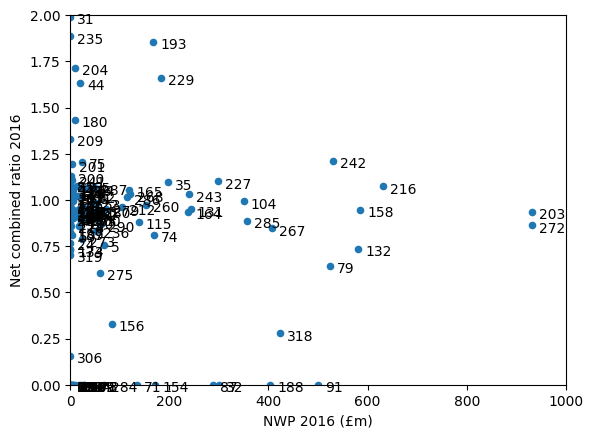

In [28]:
nwp_ncr_df = pd.merge(nwp_df, ncr_df, on='Firm', how='inner')
ax = nwp_ncr_df.plot.scatter(x='NWP 2016 (£m)', y='Net combined ratio 2016')
for idx, row in nwp_ncr_df.iterrows():
    ax.annotate(row['Firm'], (row['NWP 2016 (£m)'], row['Net combined ratio 2016']), xytext=(5,-5), textcoords='offset points')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 2)
plt.show()

In [22]:
nwp_ncr_df

,Firm,NWP 2016 (£m),NWP 2017 (£m),NWP 2018 (£m),NWP 2019 (£m),NWP 2020 (£m),Difference in NWP between 2016 and 2020,Net combined ratio 2016,Net combined ratio 2017,Net combined ratio 2018,Net combined ratio 2019,Net combined ratio 2020,Percentage Change in Net Combined Ratio
0,2,28.178059,26.865049,25.064438,23.226445,21.718558,-6.459500,0.955292,1.156944,0.943620,0.000000,0.000000,-100.00
1,4,22344.199920,23963.910710,25760.390160,25512.748840,24996.021040,2651.821120,1.080209,1.707291,2.119041,2.586257,-3.408470,-415.54
2,5,68.200993,51.663132,44.010833,42.008556,81.273653,13.072659,0.755996,1.569344,1.522143,1.309036,1.062102,40.49
3,6,1826.798004,3040.633852,1634.218908,3082.590166,3041.876078,1215.078074,1.084569,0.935182,0.926506,0.904502,0.835525,-22.96
4,9,17.242252,15.745889,19.108723,15.480891,9.513967,-7.728285,0.953236,1.008635,1.037568,1.096747,0.000000,-100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,318,422.646163,327.038879,371.149157,441.155040,0.000000,-422.646163,0.278385,-0.105852,2.128643,2.471885,1.569044,463.62
151,319,0.000964,0.000000,0.000964,0.000000,0.000000,-0.000964,0.702459,1.597187,0.557531,0.210722,1.410982,100.86
152,321,0.000000,0.000000,-1.011367,-6.599067,24.632234,24.632234,0.978004,1.002691,0.972540,0.958443,0.816870,-16.48
153,322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,-62.459124,1.566973,1.594756,1.547361,1.418557,1.168521,-25.43
